In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geospatial-learn-course-data/top_universities.csv
/kaggle/input/geospatial-learn-course-data/CA_county_population.csv
/kaggle/input/geospatial-learn-course-data/earthquakes1970-2014.csv
/kaggle/input/geospatial-learn-course-data/starbucks_locations.csv
/kaggle/input/geospatial-learn-course-data/japan-prefecture-population.csv
/kaggle/input/geospatial-learn-course-data/purple_martin.csv
/kaggle/input/geospatial-learn-course-data/CA_county_median_age.csv
/kaggle/input/geospatial-learn-course-data/CA_county_high_earners.csv
/kaggle/input/geospatial-learn-course-data/Philippines_AL258.kml
/kaggle/input/geospatial-learn-course-data/nyu_2451_34494/nyu_2451_34494/nyu_2451_34494.shx
/kaggle/input/geospatial-learn-course-data/nyu_2451_34494/nyu_2451_34494/nyu_2451_34494.dbf
/kaggle/input/geospatial-learn-course-data/nyu_2451_34494/nyu_2451_34494/nyu_2451_34494.cpg
/kaggle/input/geospatial-learn-course-data/nyu_2451_34494/nyu_2451_34494/nyu_2451_34494.shp
/kaggle/input/geospatial-l

In [2]:
import geopandas as gpd

In [ ]:
# Read in the data
full_data = gpd.read_file("../input/geospatial-learn-course-data/DEC_lands/DEC_lands/DEC_lands.shp")#shapefile

In [ ]:
full_data.head()

In [ ]:
type(full_data)

In [ ]:
data=full_data.loc[:,["CLASS","COUNTY","geometry"]].copy()

In [ ]:
data 

In [ ]:
data.CLASS.value_counts()

In [ ]:
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST','WILDERNESS'])].copy()

In [ ]:
wild_lands.head()

In [ ]:
wild_lands.plot()

In [ ]:
wild_lands.geometry.head()

In [ ]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("../input/geospatial-learn-course-data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("../input/geospatial-learn-course-data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("../input/geospatial-learn-course-data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")


In [ ]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

In [ ]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')

In [ ]:
world = gpd.read_file(world_filepath)

In [ ]:
world.head()

In [ ]:
world.plot()

In [ ]:
print(wild_lands.crs)

CRS 

In [ ]:
# loding a GEODATAFRAME containing regions of ghana

In [ ]:
regions = gpd.read_file("../input/geospatial-learn-course-data/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")

In [ ]:
print(regions.crs)

In [ ]:
#creating a geodataFrame with health Facilities in Ghana

facilities_df = pd.read_csv("../input/geospatial-learn-course-data/ghana/ghana/health_facilities.csv")

In [ ]:
facilities_df.head()

In [ ]:
#coverting the DataFrame to a GeoDataFrame




In [ ]:
facilities = gpd.GeoDataFrame(facilities_df, geometry = gpd.points_from_xy(facilities_df.Longitude , facilities_df.Latitude))

In [ ]:
#setting the coordinate reference system (CRS) to EPSG 4326

#when creating a GeoDataFrame from a CSV file , we have to set the CRS -- EPSG 4326 corresponds to latitude and longitude

facilities.crs = {'init':'epsg:4326'}

facilities.head()

In [ ]:
facilities.plot()

In [ ]:
#Re-Projecting 
# the process of changing CRS
#When plotting multiple GeoDataFrames, it's important that they all use the same CRS. In the code cell below, we change the CRS of the facilities GeoDataFrame to match the CRS of regions before plotting it.


In [ ]:
ax = regions.plot(figsize = (8,8) , color = 'whitesmoke' , linestyle=':' , edgecolor = 'black')
facilities.to_crs(epsg = 32630).plot(markersize = 1 , ax=ax)

In [ ]:
facilities.to_crs(epsg = 32630).head()

In case the EPSG code is not available in GeoPandas, we can change the CRS with what's known as the "proj4 string" of the CRS. For instance, the proj4 string to convert to latitude/longitude coordinates is as follows:

+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs



In [ ]:
#changing the CRS to EPSG 4326 
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

In [ ]:
facilities.head()

In [ ]:
regions.head()

a Point for the epicenter of an earthquake,
a LineString for a street, or
a Polygon to show country boundaries.

In [ ]:
facilities.geometry.x.head() # x point

In [ ]:
# we can get the Length of a LineString from the length attribute 
#we can get the area of a polygon From the area attribute

In [ ]:
# Calculating the area (in square meters) of each polygon in the GeoDataFrame 
regions.loc[:, "AREA"] = regions.geometry.area / 10**6

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions.head()


In [ ]:
regions.geometry.area.sum()

In [ ]:
regions.geometry.length

In [ ]:
import folium
from folium import Choropleth , Circle , Marker
from folium.plugins import HeatMap , MarkerCluster

In [ ]:
m_1 = folium.Map(location=[42.32,-71.0589] , tiles = 'openstreetmap' , zoom_start = 10)
m_1

In [ ]:
m_2 = folium.Map(location = [13.6288 , 79.4192] , tiles='openstreetmap' , zoom_start = 10)
m_2
#https://github.com/python-visualization/folium/tree/master/folium/templates/tiles
#for more stylings

In [ ]:
# Load the data
crimes = pd.read_csv("../input/geospatial-learn-course-data/crimes-in-boston/crimes-in-boston/crime.csv", encoding='latin-1')

# Drop rows with missing locations
crimes.dropna(subset=['Lat', 'Long', 'DISTRICT'], inplace=True)

# Focus on major crimes in 2018
crimes = crimes[crimes.OFFENSE_CODE_GROUP.isin([
    'Larceny', 'Auto Theft', 'Robbery', 'Larceny From Motor Vehicle', 'Residential Burglary',
    'Simple Assault', 'Harassment', 'Ballistics', 'Aggravated Assault', 'Other Burglary', 
    'Arson', 'Commercial Burglary', 'HOME INVASION', 'Homicide', 'Criminal Harassment', 
    'Manslaughter'])]
crimes = crimes[crimes.YEAR>=2018]
# Print the first five rows of the table
crimes

In [ ]:
#reducing the ammount of data
daytime_robberies = crimes[((crimes.OFFENSE_CODE_GROUP == 'Robbery') & \
                            (crimes.HOUR.isin(range(9,18))))]

daytime_robberies

CREATING A MARKER CLUSTER MAP

In [ ]:
#creating map
m_2 = folium.Map(location=[42.32,-71.0589] , tiles='cartodbpositron' ,zoom_start=13)

#adding points using folium.Marker()

for i,row in daytime_robberies.iterrows():
    Marker([row['Lat'],row['Long']]).add_to(m_2)
    
m_2    
#add_to follium

In [ ]:
m_3 = folium.Map(location=[42.32,-71.0589] , tiles='cartodbpositron' , zoom_start=13)

#ADDING POINTS TO THE MAP
mc=MarkerCluster()
import math

for i , row in daytime_robberies.iterrows(): #isnan returns true if it is not a num
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(Marker([row['Lat'],row['Long']]))
m_3.add_child(mc)

m_3

creating a bubble map

In [ ]:
#creating a map
m_4 = folium.Map(location=[42.32 , -71.0589] , tiles='cartodbpositron' , zoom_start = 13)

def color_producer(val):
    if val <= 12:
        return 'forestgreen'
    else:
        return 'darkred'

#adding a bubble map to the base map
for i in range(0,len(daytime_robberies)):
    Circle(
    location=[daytime_robberies.iloc[i]['Lat'],daytime_robberies.iloc[i]['Long']],
    radius=20,
    color=color_producer(daytime_robberies.iloc[i]['HOUR'])).add_to(m_4) 
m_4
    


    
#9-12 green
#13-17 red



    

HEAT MAP

In [ ]:
m_5 = folium.Map(location=[42.32 , -71.0589] , tiles = 'cartodbpositron' , zoom_start = 12)

#adding a heat map

HeatMap(data=crimes[['Lat','Long']] , radius=10).add_to(m_5)

m_5



In [ ]:
from folium import Marker
from geopandas.tools import geocode
#from learntools.geospatial.tools import geocode

In [ ]:
#we are using open source 'openstreetmap nominatim geocoder'

result = geocode('The Great Pyramid of Giza' , provider='nominatim')
print(result)

In [ ]:
point = result.geometry.iloc[0]
print(point.y)
print(point.x)


In [ ]:
universities = pd.read_csv("../input/geospatial-learn-course-data/top_universities.csv")
universities.head()

In [ ]:
def my_geocoder(row):
    try:
        point = geocode(row, provider='nominatim').geometry.iloc[0]
        return pd.Series({'Latitude': point.y, 'Longitude': point.x, 'geometry': point})
    except:
        return None

universities[['Latitude', 'Longitude', 'geometry']] = universities.apply(lambda x: my_geocoder(x['Name']), axis=1)

print("{}% of addresses were geocoded!".format(
    (1 - sum(np.isnan(universities["Latitude"])) / len(universities)) * 100))

# Drop universities that were not successfully geocoded
universities = universities.loc[~np.isnan(universities["Latitude"])]
universities = gpd.GeoDataFrame(universities, geometry=universities.geometry)
universities.crs = {'init': 'epsg:4326'}
universities.head()

In [ ]:
m = folium.Map(location=[54, 15], tiles='openstreetmap', zoom_start=2)

for idx, row in universities.iterrows():
    Marker([row['Latitude'], row['Longitude']], popup=row['Name']).add_to(m)


----------------------------------------------------------------------------

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

In [ ]:
europe = world.loc[world.continent=='Europe'].reset_index(drop =True)

In [ ]:
europe.head()

In [ ]:
europe_stats = europe[["name", "pop_est", "gdp_md_est"]]
europe_boundaries = europe[["name", "geometry"]]


In [ ]:
europe_boundaries.head()

In [ ]:
europe_stats.head()

In [ ]:
europe = europe_boundaries.merge(europe_stats , on='name')
europe.head()

In [ ]:
#spatial joins to match universities with countries in europe

european_universities = gpd.sjoin(universities , europe)
print("We located {} universities.".format(len(universities)))
print("Only {} of the universities were located in Europe (in {} different countries).".format(
    len(european_universities), len(european_universities.name.unique())))

european_universities.head()


In [3]:
import folium
from folium import Marker , GeoJson
from folium.plugins import HeatMap

In [4]:
releases = gpd.read_file("../input/geospatial-learn-course-data/toxic_release_pennsylvania/toxic_release_pennsylvania/toxic_release_pennsylvania.shp") 
releases.head()

,YEAR,CITY,COUNTY,ST,LATITUDE,LONGITUDE,CHEMICAL,UNIT_OF_ME,TOTAL_RELE,geometry
0,2016,PHILADELPHIA,PHILADELPHIA,PA,40.005901,-75.072103,FORMIC ACID,Pounds,0.160,POINT (2718560.227 256380.179)
1,2016,PHILADELPHIA,PHILADELPHIA,PA,39.920120,-75.146410,ETHYLENE GLYCOL,Pounds,13353.480,POINT (2698674.606 224522.905)
2,2016,PHILADELPHIA,PHILADELPHIA,PA,40.023880,-75.220450,CERTAIN GLYCOL ETHERS,Pounds,104.135,POINT (2676833.394 261701.856)
3,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,LEAD COMPOUNDS,Pounds,1730.280,POINT (2684030.004 221697.388)
4,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,BENZENE,Pounds,39863.290,POINT (2684030.004 221697.388)


In [19]:
releases[['YEAR','CITY','COUNTY']]

,YEAR,CITY,COUNTY
0,2016,PHILADELPHIA,PHILADELPHIA
1,2016,PHILADELPHIA,PHILADELPHIA
2,2016,PHILADELPHIA,PHILADELPHIA
3,2016,PHILADELPHIA,PHILADELPHIA
4,2016,PHILADELPHIA,PHILADELPHIA
...,...,...,...
4658,1987,PHILADELPHIA,PHILADELPHIA
4659,1987,PHILADELPHIA,PHILADELPHIA
4660,1987,PHILADELPHIA,PHILADELPHIA
4661,1987,PHILADELPHIA,PHILADELPHIA


In [5]:
stations = gpd.read_file("../input/geospatial-learn-course-data/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.shp")
stations.head()

,SITE_NAME,ADDRESS,BLACK_CARB,ULTRAFINE_,CO,SO2,OZONE,NO2,NOY_NO,PM10,...,PAMS_VOC,TSP_11101,TSP_METALS,TSP_LEAD,TOXICS_TO1,MET,COMMUNITY_,LATITUDE,LONGITUDE,geometry
0,LAB,1501 East Lycoming Avenue,N,N,Y,N,Y,Y,Y,N,...,Y,N,Y,N,y,N,N,40.008606,-75.097624,POINT (2711384.641 257149.310)
1,ROX,Eva and Dearnley Streets,N,N,N,N,N,N,N,N,...,N,N,Y,N,Y,N,N,40.050461,-75.236966,POINT (2671934.290 271248.900)
2,NEA,Grant Avenue and Ashton Street,N,N,N,N,Y,N,N,N,...,N,N,N,N,N,Y,N,40.072073,-75.013128,POINT (2734326.638 280980.247)
3,CHS,500 South Broad Street,N,N,N,N,N,N,N,N,...,N,N,Y,N,Y,N,N,39.944510,-75.165442,POINT (2693078.580 233247.101)
4,NEW,2861 Lewis Street,N,N,Y,Y,Y,N,Y,Y,...,N,Y,N,Y,N,Y,N,39.991688,-75.080378,POINT (2716399.773 251134.976)


In [7]:
print(releases.crs)
print(stations.crs)

{'init': 'epsg:2272'}
{'init': 'epsg:2272'}


In [13]:
recent_release = releases.iloc[1]

distances=stations.geometry.distance(recent_release.geometry)

In [14]:
distances

0     35014.672707
1     53836.447391
2     66771.991304
3     10364.704532
4     31974.738085
5     11470.011126
6     14834.416163
7     24475.993504
8     66758.597025
9     11271.204192
10    30331.881998
11    11929.172386
dtype: float64

In [15]:
distances.describe()

count       12.000000
mean     30752.819201
std      21235.997229
min      10364.704532
25%      11814.382071
50%      27403.937751
75%      39720.116378
max      66771.991304
dtype: float64

In [23]:
distances[distances.idxmin()] #it returns the index

10364.704531589343

In [21]:
print('Closest monitoring station ({} feet):'.format(distances.min()))
print(stations.iloc[distances.idxmin()][["ADDRESS", "LATITUDE", "LONGITUDE"]])

Closest monitoring station (10364.704531589343 feet):
ADDRESS      500 South Broad Street
LATITUDE                    39.9445
LONGITUDE                  -75.1654
Name: 3, dtype: object


In [26]:
distances.min()

10364.704531589343

In [27]:
#  creating a buffer


two_miles_buffer = stations.geometry.buffer(2*5280)
two_miles_buffer.head()


0    POLYGON ((2721944.641 257149.310, 2721893.792 ...
1    POLYGON ((2682494.290 271248.900, 2682443.441 ...
2    POLYGON ((2744886.638 280980.247, 2744835.789 ...
3    POLYGON ((2703638.580 233247.101, 2703587.731 ...
4    POLYGON ((2726959.773 251134.976, 2726908.924 ...
dtype: geometry

In [ ]:
# since folium requires lattitude and longitude coordinates for plotting a map


In [28]:
m = folium.Map(location = [39.9526 , -75.1652] , zoom_start=11)
m

In [29]:
HeatMap(data=releases[['LATITUDE','LONGITUDE']] , radius=15).add_to(m)

In [30]:
m

In [32]:
for i , row in stations.iterrows():
    Marker([row['LATITUDE'],row['LONGITUDE']]).add_to(m)
m    

In [ ]:
#remainder

#stations = air quality monitoring stations
#releases = toxic releases

In [34]:
#PLOttING EACH MAP ON POLYGON

GeoJson(two_miles_buffer).add_to(m)
m

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [35]:
two_miles_buffer.crs

{'init': 'epsg:2272'}

In [36]:
GeoJson(two_miles_buffer.to_crs(epsg=4326)).add_to(m)
m

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [38]:
two_miles_buffer.crs

{'init': 'epsg:2272'}

In [39]:
#Now, to test if a toxic release occurred within 2 miles of any monitoring station, we could run 12 different tests for each polygon (to check individually if it contains the point).

#But a more efficient way is to first collapse all of the polygons into a MultiPolygon object. We do this with the unary_union attribute.



Type <class 'shapely.geometry.multipolygon.MultiPolygon'>


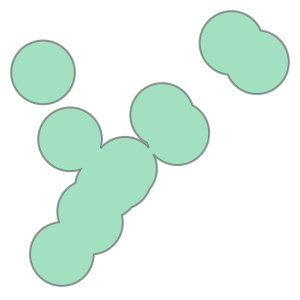

In [41]:
my_union = two_miles_buffer.geometry.unary_union
print('Type' , type(my_union))

my_union

In [42]:
my_union.contains(releases.iloc[360].geometry)

True

In [ ]:
my_union.contains(releases.iloc[358].geometry)